<a href="https://colab.research.google.com/github/shrmtmt/cyclic_encoding_experiment/blob/main/Cyclic_Encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [2]:
class NeuralNetwork:
    def __init__(self, input_dim, hidden_units):
        self.input_dim = input_dim
        self.hidden_units = hidden_units
        self._build_model()

    def _build_model(self):
        input_layer = Input(shape=(self.input_dim,))
        x = input_layer
        for units in self.hidden_units:
            x = Dense(units, activation='relu')(x)
        output_layer = Dense(1)(x)
        self.model = Model(inputs=input_layer, outputs=output_layer)
        self.model.compile(loss='mean_squared_error', optimizer=Adam())

    def train(self, input_data, output_data, epochs=1000, batch_size=32, verbose=1):
        self.model.fit(input_data, output_data, epochs=epochs, batch_size=batch_size, verbose=verbose)

    def predict(self, input_data):
        return self.model.predict(input_data)

In [3]:
def create_input_data(x):
    sin_x = np.sin(x)
    cos_x = np.cos(x)
    return np.column_stack((sin_x, cos_x))

In [4]:
def create_target_data(x, func):
    if func == 'sin(x)':
        return np.sin(x)
    elif func == 'sin(2x)':
        return np.sin(2*x)
    elif func == 'sin(5x)':
        return np.sin(5*x)
    elif func == 'sawtooth':
        return x % (2 * np.pi)
    elif func == 'step':
        return np.floor(x % (2 * np.pi))
    elif func == 'jigzag_step':
        return ((np.floor(x % (2 * np.pi)))*2) % 5
    elif func == 'x':
        return x
    else:
        raise ValueError("Invalid function")

In [5]:
def plot_results(test_x, true_values, predictions, func_name, hidden_units):
    plt.figure(figsize=(16, 6))
    plt.scatter(test_x, true_values, label='True Values', color='salmon')
    plt.plot(test_x, predictions, label='Predictions', linestyle='dashed', color='darkcyan')
    plt.xlabel('x')
    plt.ylabel(func_name)
    plt.title(f'Function: {func_name}, Hidden Units: {hidden_units}')
    plt.legend()
    plt.xticks([-2*np.pi, -1.5*np.pi, -np.pi, -0.5*np.pi, 0, 0.5*np.pi, np.pi, 1.5*np.pi, 2*np.pi],
               ['-2π', '-1.5π', '-π', '-0.5π', '0', '0.5π', 'π', '1.5π', '2π'])
    plt.show()

In [6]:
def train_and_plot(func_name, hidden_units, epochs):
    # Data generation
    x = np.linspace(-2*np.pi, 2*np.pi, 100)

    # Instantiating the neural network
    input_dim = 2
    nn = NeuralNetwork(input_dim, hidden_units)

    # Choosing the target variable
    output_data = create_target_data(x, func_name)

    # Training
    input_data = create_input_data(x)
    nn.train(input_data, output_data, epochs=epochs, verbose=0)

    # Predictions for the test data
    test_x = np.linspace(-2*np.pi, 2*np.pi, 100)
    test_input_data = create_input_data(test_x)
    predictions = nn.predict(test_input_data)

    # Plotting the results
    plot_results(test_x, output_data, predictions, func_name, hidden_units)


4/4 [==============================] - 0s 4ms/step


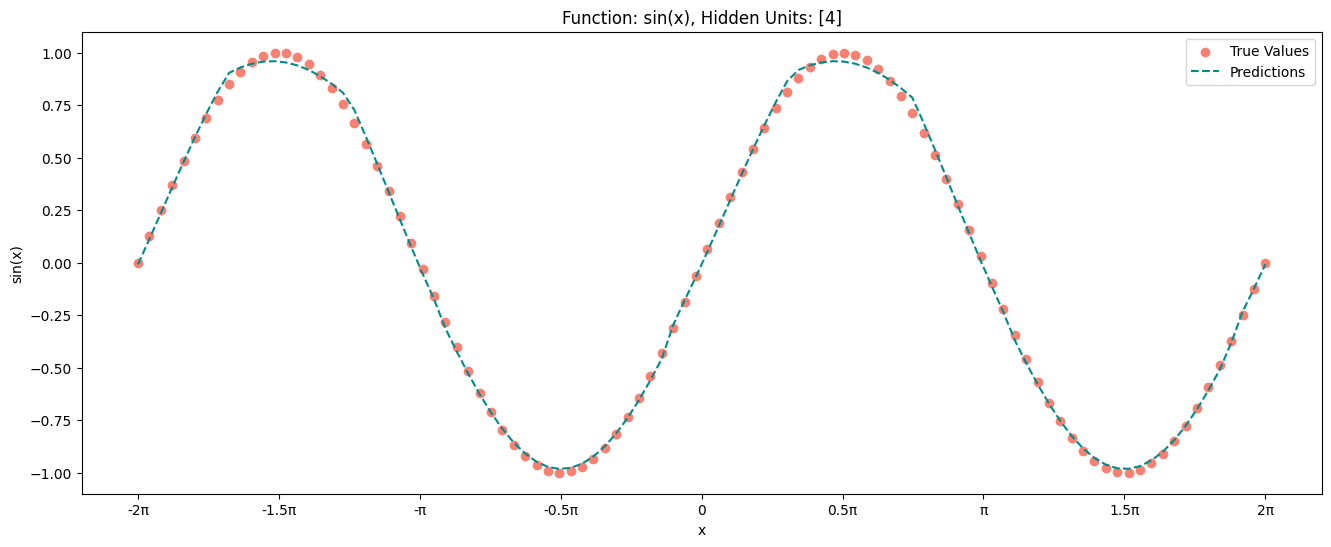

In [7]:
func_name = 'sin(x)'
hidden_units = [4]
epochs = 1000
train_and_plot(func_name, hidden_units, epochs)

4/4 [==============================] - 0s 3ms/step


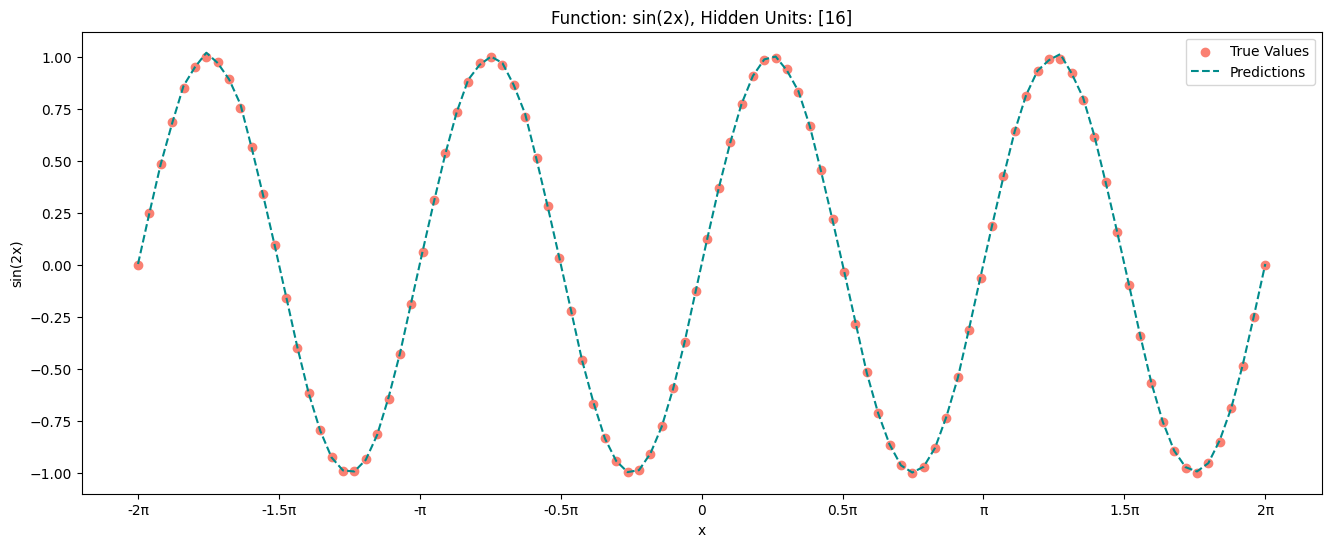

In [8]:
func_name = 'sin(2x)'
hidden_units = [16]
epochs = 1000
train_and_plot(func_name, hidden_units, epochs)

4/4 [==============================] - 0s 4ms/step


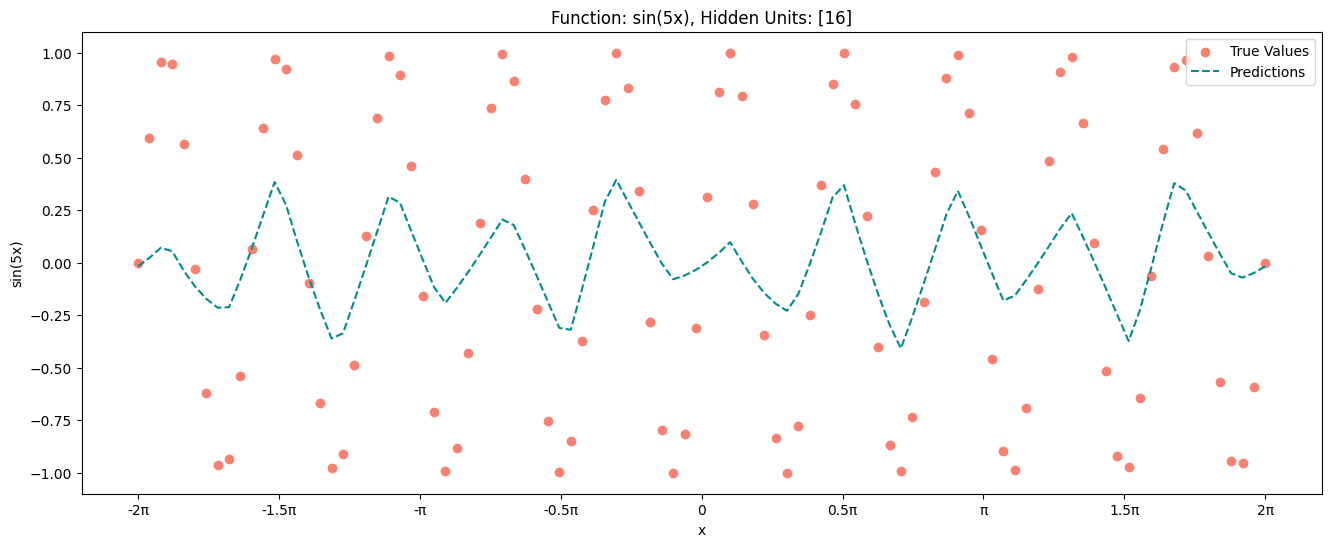

In [9]:
func_name = 'sin(5x)'
hidden_units = [16]
epochs = 1000
train_and_plot(func_name, hidden_units, epochs)

4/4 [==============================] - 0s 4ms/step


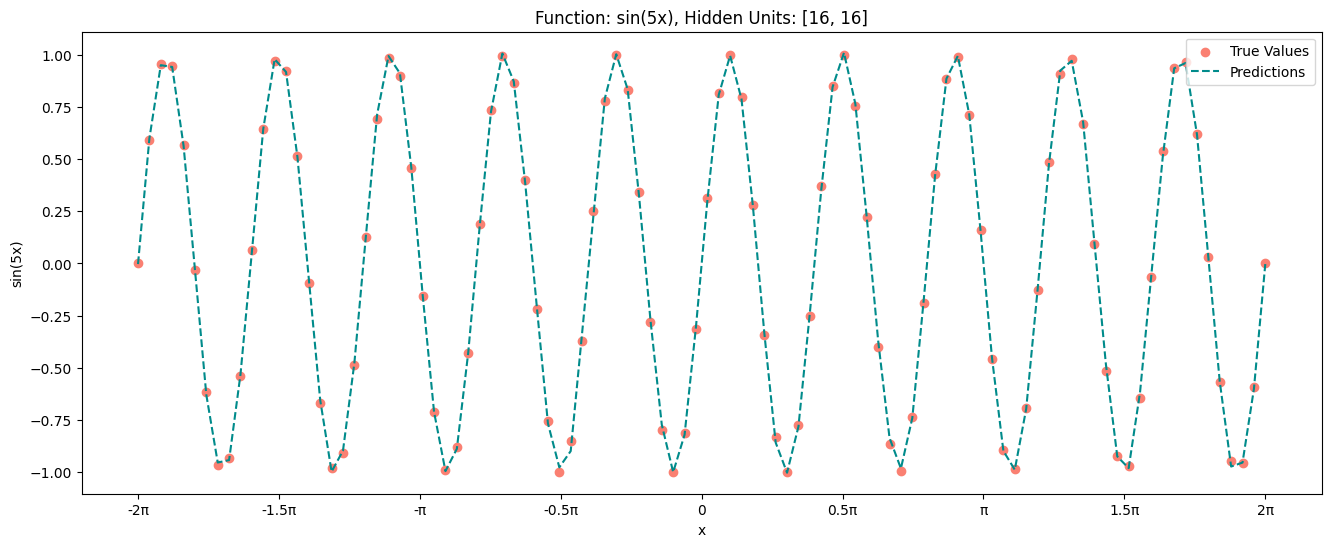

In [10]:
func_name = 'sin(5x)'
hidden_units = [16, 16]
epochs = 1000
train_and_plot(func_name, hidden_units, epochs)

4/4 [==============================] - 0s 3ms/step


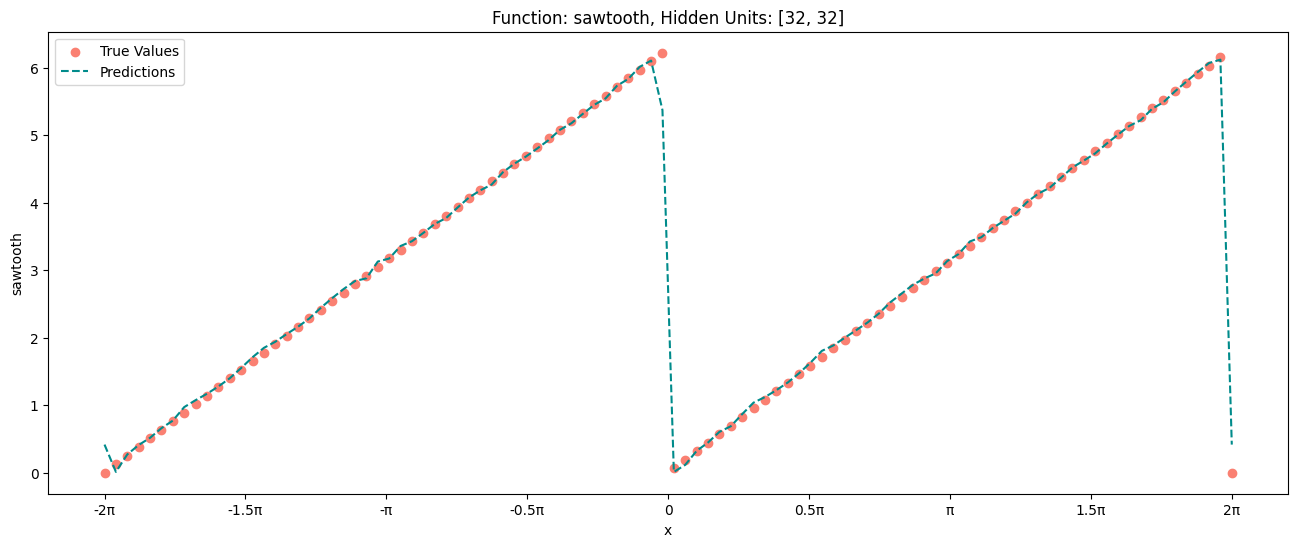

In [11]:
func_name = 'sawtooth'
hidden_units = [32, 32]
epochs = 1000
train_and_plot(func_name, hidden_units, epochs)

4/4 [==============================] - 0s 4ms/step


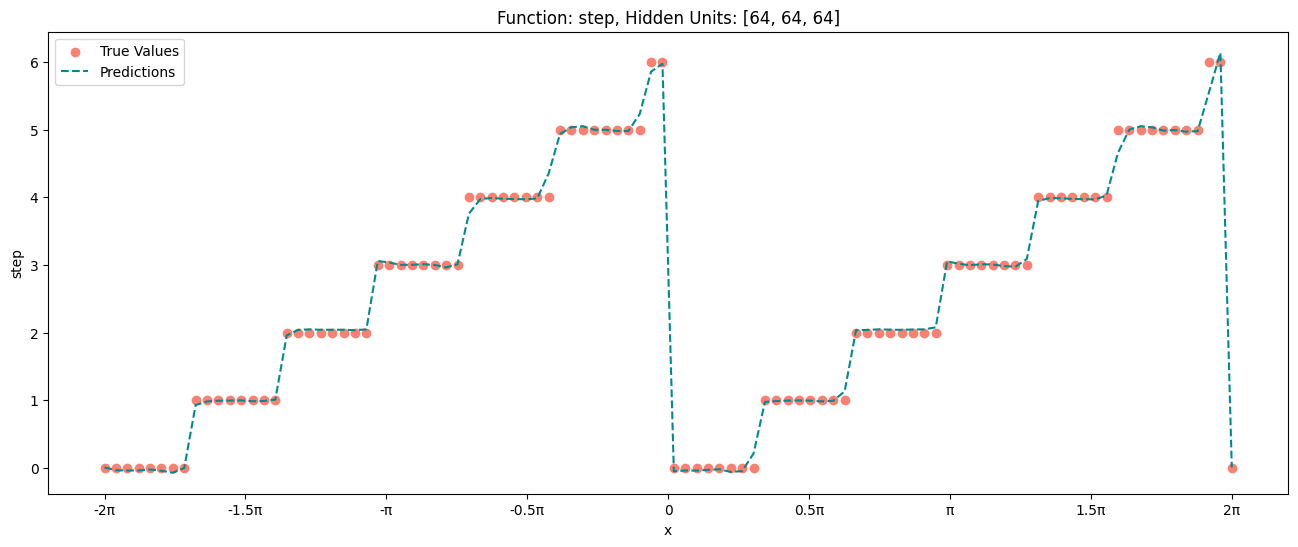

In [12]:
func_name = 'step'
hidden_units = [64, 64, 64]
epochs = 1000
train_and_plot(func_name, hidden_units, epochs)

4/4 [==============================] - 0s 4ms/step


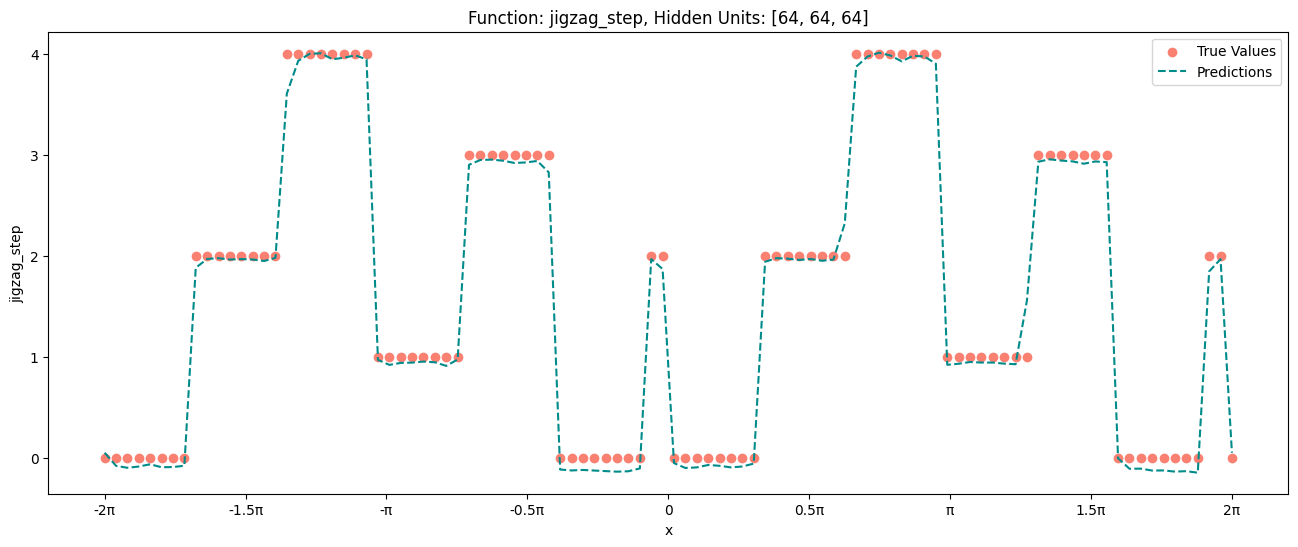

In [13]:
func_name = 'jigzag_step'
hidden_units = [64, 64, 64]
epochs = 1000
train_and_plot(func_name, hidden_units, epochs)

4/4 [==============================] - 0s 4ms/step


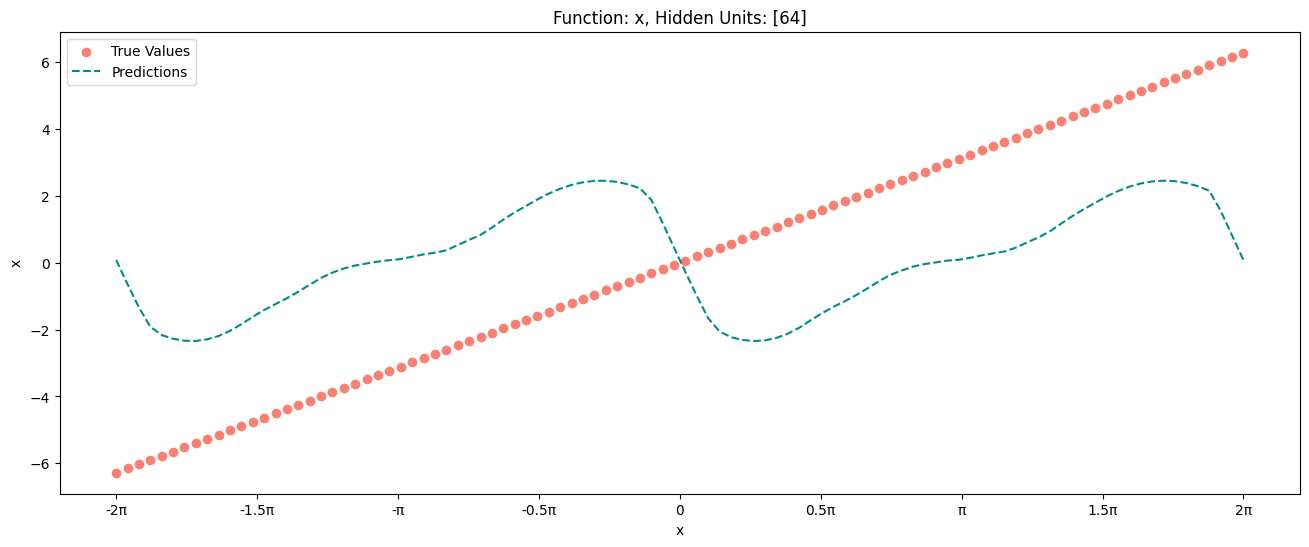

In [14]:
func_name = 'x'
hidden_units = [64]
epochs = 1000
train_and_plot(func_name, hidden_units, epochs)